# WIE3007 Data Mining Project

Predictive Model Development (Logistic Regression)
*   Name : Nasrin Ameera Binti Mohammad Zabri
*   Matrics Num : 22002363


Predictive Model Development (Random Forest)
*   Name : Fatin Aina binti Nor Ikhsan
*   Matrics Num : 22001278

1. Import required libraries

In [32]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

2. Load model-ready dataset

In [33]:
X = pd.read_csv("X_features.csv")
y = pd.read_csv("y_target.csv")

In [34]:
print(X.shape)
print(y.value_counts())

(1200, 45)
churn
0        925
1        275
Name: count, dtype: int64


3. Train-test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

4. Feature Scaling

In [36]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

Train Logistic Regression Model

In [37]:
log_reg = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

log_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Model Predictions

In [38]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

Model Evaluation Metrics (Accuracy, F1, ROC-AUC)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9958
F1-score: 0.9910
ROC-AUC: 0.9999


Confusion Matrix

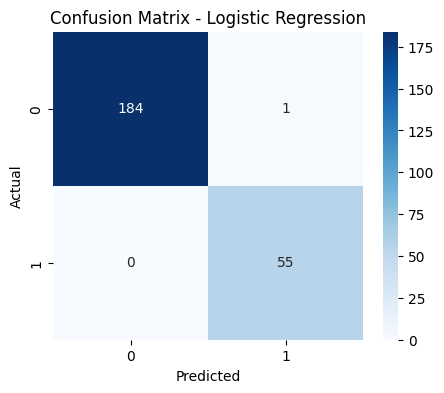

In [40]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ROC Curve

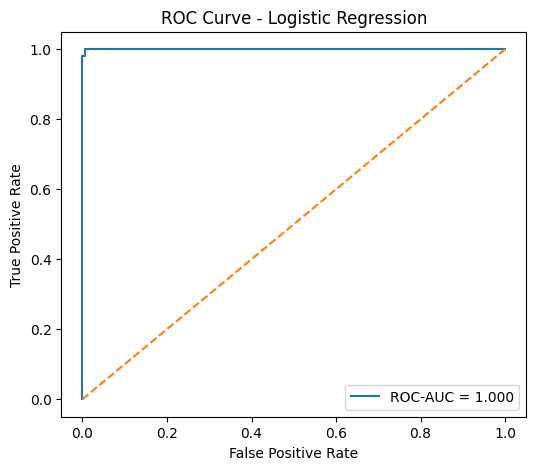

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

Feature Importance

In [42]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
})

feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(
    by="Abs_Coefficient",
    ascending=False
)

feature_importance.head(10)

,Feature,Coefficient,Abs_Coefficient
22,churn_probability,5.715324,5.715324
9,email_open_rate,-2.464206,2.464206
21,order_frequency_per_month,-0.350542,0.350542
20,total_spent_per_day,0.333268,0.333268
7,days_since_last_login,0.240179,0.240179
1,account_age_days,0.236466,0.236466
25,avg_transaction_value,-0.220484,0.220484
5,avg_order_value,-0.220457,0.220457
26,max_transaction_value,0.217985,0.217985
2,recency,0.211773,0.211773


*Plot Top Features

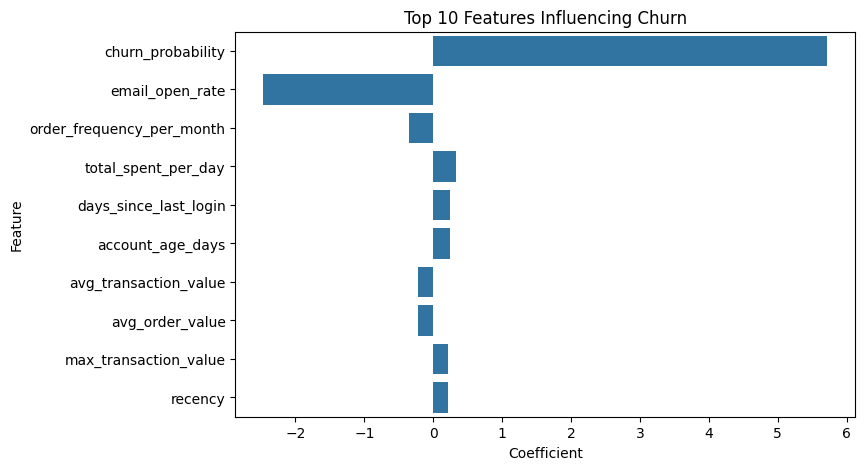

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=feature_importance.head(10),
    x="Coefficient",
    y="Feature"
)
plt.title("Top 10 Features Influencing Churn")
plt.show()

**Model Interpretation**

Logistic Regression provides interpretable coefficients indicating the direction and strength
of each feature’s influence on churn. Features with higher absolute coefficients have stronger
predictive power. Positive coefficients increase churn likelihood, while negative coefficients
are associated with customer retention.

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

Train Random Forest Model

In [45]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None
)

rf_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

Model Predictions

In [46]:
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

Model Evaluation Metrics (Accuracy, F1, ROC-AUC)




In [47]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print(f"ROC-AUC: {roc_auc_rf:.4f}")

Accuracy: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000


Confusion Matrix




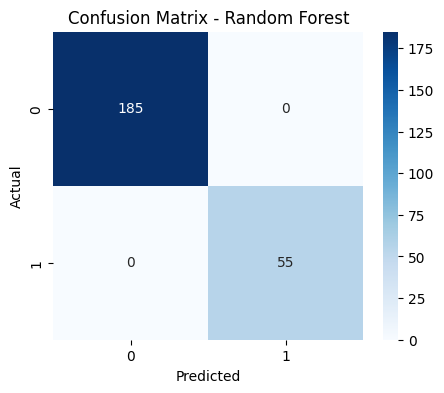

In [48]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

ROC Curve

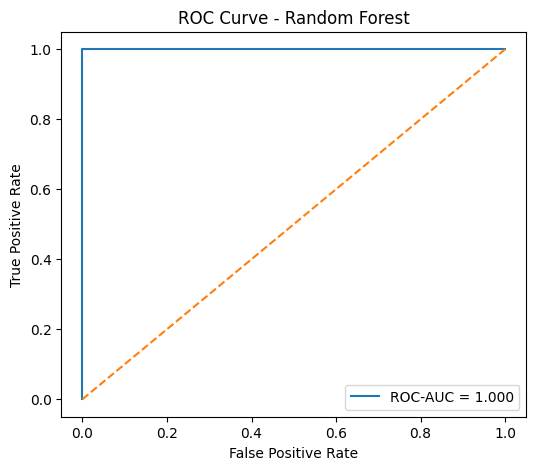

In [49]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc_rf:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()

Feature Importance

In [50]:
rf_feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
})

rf_feature_importance = rf_feature_importance.sort_values(
    by="Importance",
    ascending=False
)

rf_feature_importance.head(10)

,Feature,Importance
22,churn_probability,0.300335
9,email_open_rate,0.119468
23,total_transactions,0.078602
2,recency,0.076427
3,frequency,0.059059
6,total_orders,0.043483
7,days_since_last_login,0.036138
11,frustration_index,0.025430
21,order_frequency_per_month,0.022811
20,total_spent_per_day,0.022352


*Plot Top Features

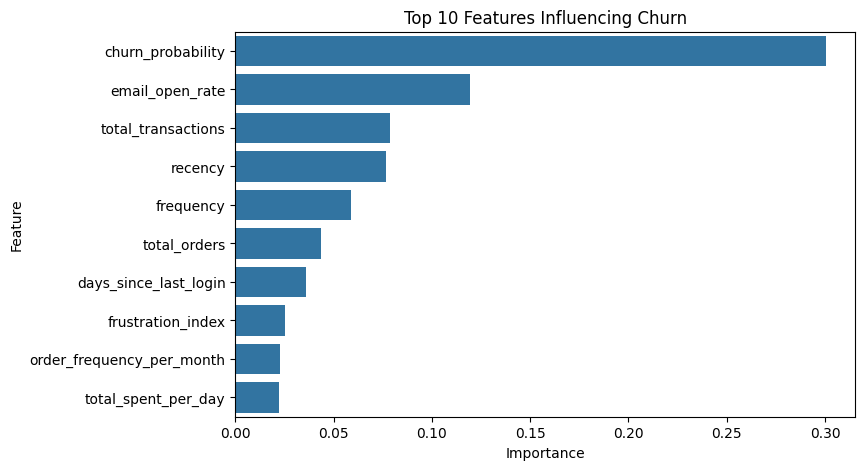

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=rf_feature_importance.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Features Influencing Churn")
plt.show()

**Model Interpretation**

Random Forest evaluates feature importance based on how much each feature contributes to reducing impurity across multiple decision trees. Features with higher importance scores play a more significant role in the model’s decision-making process. Unlike Logistic Regression, Random Forest does not provide directional effects but is able to capture non-linear relationships and interactions between features, leading to stronger predictive performance.

# Model Comparison

In [52]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy, accuracy_rf],
    "F1-score": [f1, f1_rf],
    "ROC-AUC": [roc_auc, roc_auc_rf]
})

comparison_df

,Model,Accuracy,F1-score,ROC-AUC
0,Logistic Regression,0.995833,0.990991,0.999902
1,Random Forest,1.000000,1.000000,1.000000


**Model Comparison Interpretation**

Both models demonstrate strong predictive performance. Logistic Regression achieved an accuracy of 0.9958, an F1-score of 0.9909, and a ROC-AUC of 0.9999, indicating that it is highly effective in predicting churn while maintaining good balance between precision and recall.

Random Forest slightly outperforms Logistic Regression, achieving perfect scores across all evaluation metrics. This suggests that Random Forest is better able to capture complex, non-linear relationships and feature interactions present in the data, leading to improved classification performance.

Overall, while Logistic Regression provides better interpretability through its coefficients, Random Forest offers superior predictive accuracy, making it the more suitable model for this task.